In [4]:
# Esta progarma resuelve la ecuacion diferencial de Duffing.
# Es una ecuación diferencial no lineal el movimiento de un oscilador armonico
# Donde los coeficientes de elasticidad no lineal
# Se le aplica un forzamiento periodico
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode


In [1]:
def fun(t, z, omega):
    """
    Right hand side of the differential equations
      dx/dt = -omega * y
      dy/dt = omega * x
    """
    x, y = z
    f = [-omega*y, omega*x]
    return f

In [5]:
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dop853'.
solver = ode(fun)
solver.set_integrator('dop853')

In [6]:
omega = 2 * np.pi
solver.set_f_params(omega)

In [7]:
t0 = 0.0
z0 = [1, -0.25]
solver.set_initial_value(z0, t0)

In [8]:
# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
omega = 2 * np.pi
solver.set_f_params(omega)

In [9]:
# Set the initial value z(0) = z0.
t0 = 0.0
z0 = [1, -0.25]
solver.set_initial_value(z0, t0)

In [10]:
# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1 = 2.5
N = 75
t = np.linspace(t0, t1, N)
sol = np.empty((N, 2))
sol[0] = z0

In [11]:
# Repeatedly call the `integrate` method to advance the
# solution to time t[k], and save the solution in sol[k].
k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1

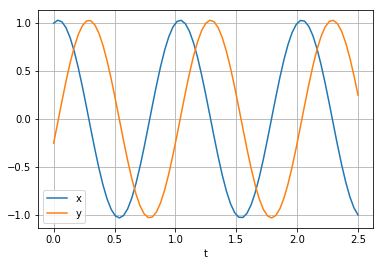

In [12]:
# Plot the solution...
plt.plot(t, sol[:,0], label='x')
plt.plot(t, sol[:,1], label='y')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()